In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import os
def plot(loss_base, loss_gp, shift, name):
    plt.plot(shift, loss_base, marker = 'o', label = 'No gradient penalisation')
    plt.plot(shift, loss_gp, marker = 'x', label = 'Gradient penalisation 1e-2')
    plt.legend()
    plt.ylabel('Loss for parameter prediction')
    plt.xlabel(name)
    plt.show()
def plot_diff(loss_base, loss_gp, shift, name):
    plt.plot(shift, torch.tensor(loss_base) - torch.tensor(loss_gp), marker = 'x', color = 'r')
    plt.ylabel('Loss for parameter prediction')
    plt.xlabel(name)
    plt.show()
    
def plot_with_std(A,B, shift, name, save):
    plt.figure(figsize = (4,3.5))
    A_mean = A.mean(axis = 0)
    B_mean = B.mean(axis = 0)
    A_std = A.std(axis = 0)/np.sqrt(len(A))
    B_std = B.std(axis = 0)/np.sqrt(len(B))
    
    col = '#1f77b4'
    col2 = '#ff7f0e'

    plt.plot(shift, A_mean, marker = 'o')
    plt.fill_between(shift, A_mean -A_std, A_mean + A_std, alpha = 0.15, color = col)
    plt.plot(shift, B_mean, marker = 'x')
    plt.fill_between(shift, B_mean -B_std, B_mean + B_std, alpha = 0.15, color = col2)
    plt.legend(['No gradient\npenalty', 'Gradient penalty'], fontsize=12, frameon=False)
    plt.xlabel(name)
    plt.ylabel('Test squared error loss')
    destination = os.path.join('./figures', save)
    plt.savefig(destination, dpi = 150, bbox_inches="tight")

    plt.show()
def plot_diff2(loss_base, loss_gp, shift, name, save):
    plt.figure(figsize = (4,3.5))
    plt.plot(shift, torch.tensor(loss_base).mean(dim = 0) - torch.tensor(loss_gp).mean(dim = 0), marker = 'x', color = 'r')
    plt.ylabel('Test squared error loss')
    plt.xlabel(name)
    destination = os.path.join('./figures', save)
    plt.savefig(destination, dpi = 150, bbox_inches="tight")
    plt.show()

In [2]:
base_h_shift = torch.tensor([[0.005070110317319632, 0.0033043448347598314, 0.0029398868791759014, 0.0030105705372989178, 0.004034176003187895, 0.006154187023639679],
         [0.004959024954587221, 0.003170948475599289, 0.0028583675157278776, 0.0030543827451765537, 0.004051817115396261, 0.006660309620201588],
         [0.005144782364368439, 0.0033301447983831167, 0.0031314713414758444, 0.003302421187981963, 0.004171300213783979, 0.007861301302909851]    ]
                           )
gp_h_shift = torch.tensor([[0.00347934034653008, 0.002319297520443797, 0.001888799830339849, 0.0021246664691716433, 0.002753304783254862, 0.004852075129747391],
             [0.0034973095171153545, 0.002167161786928773, 0.001900663017295301, 0.0021461958531290293, 0.0029243500903248787, 0.004926299676299095],
             [0.003525492502376437, 0.002321170875802636, 0.0019895604345947504, 0.0022333720698952675, 0.002890100469812751, 0.004855707287788391]]
                         )
base_h_v = torch.tensor([[0.0025088409893214703, 0.0027247583493590355, 0.0027953435201197863, 0.0030886665917932987, 0.004189560189843178, 0.00676289526745677],
           [0.0024963254109025, 0.00268098758533597, 0.002764540957286954, 0.003049572231248021, 0.004336221609264612, 0.007175651378929615],
           [0.0028270867187529802, 0.002923704218119383, 0.0030591809190809727, 0.0032750065438449383, 0.004494809545576572, 0.007643226068466902]]
                       )
gp_h_v = torch.tensor([[0.0013847557129338384, 0.0016329118516296148, 0.001811502268537879, 0.002090230816975236, 0.0030479098204523325, 0.005482660140842199],
         [0.0013412077678367496, 0.001602450734935701, 0.0018527139909565449, 0.002188638085499406, 0.0031962147913873196, 0.0055849323980510235],
         [0.001446323934942484, 0.001644453383050859, 0.0018660265486687422, 0.0021881915163248777, 0.003061634721234441, 0.00565745122730732]]
                     )

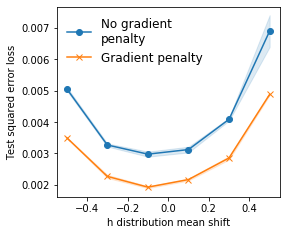

In [3]:
shift = torch.linspace(-0.5, 0.5, 6)
plot_with_std(base_h_shift, gp_h_shift, shift, 'h distribution mean shift', 'h_shift')

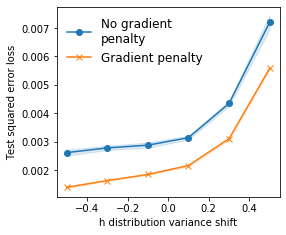

In [4]:
plot_with_std(base_h_v, gp_h_v, shift, 'h distribution variance shift', 'h_var_shift')